In [ ]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import warnings
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
#path= "/content/drive/MyDrive/netflix_titles.csv"

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data = pd.read_csv("netflix_titles.csv", index_col ="country")
netflix_ = data[["release_year", "rating"]]
netflix_.head()

,release_year,rating
country,,
Brazil,2020,TV-MA
Mexico,2016,TV-MA
Singapore,2011,R
United States,2009,PG-13
United States,2008,PG-13


In [ ]:
#data = pd.read_csv("netflix_titles.csv", index_col ="country") 
netflix_
n1 = netflix_.loc[["United States","Mexico","Canada"]]
n1

,release_year,rating
country,,
United States,2009,PG-13
United States,2008,PG-13
United States,1997,R
United States,2017,TV-MA
United States,2019,R
...,...,...
Canada,2018,TV-MA
Canada,2016,PG-13
Canada,2018,R


In [ ]:
n1
first = n1.loc[["Mexico","Canada"],
                   ["release_year", "rating",]]

first


,release_year,rating
country,,
Mexico,2016,TV-MA
Mexico,2019,TV-MA
Mexico,2016,TV-MA
Mexico,2017,TV-MA
Mexico,2020,TV-MA
...,...,...
Canada,2018,TV-MA
Canada,2016,PG-13
Canada,2018,R


In [ ]:
#netflix_2020 = first.loc[first['release_year'] == 2020]
#netflix_2020

In [ ]:
netflix_2020 = first.loc[(first['rating'] == 'TV-MA') & (first['release_year'] == 2020)]
netflix_2020.reset_index

<bound method DataFrame.reset_index of          release_year rating
country                     
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Mexico           2020  TV-MA
Canada           2020  TV-MA
Canada           2020  TV-MA
Canada           2020  TV-MA
Canada           2020  TV-MA
Canada           2020  TV-MA
Canada           2020  TV-MA
Canada           2020  TV-MA>

In [ ]:
pies = ["USA", "Mexico", "Canada"]
pie_votes = netflix_2020['rating'].value_counts()
colors = ["red","blue",'yellow']
explode = (0.5,0,0)

In [ ]:
pie_votes = netflix_2020['rating'].value_counts()
pie_votes

TV-MA    20
Name: rating, dtype: int64

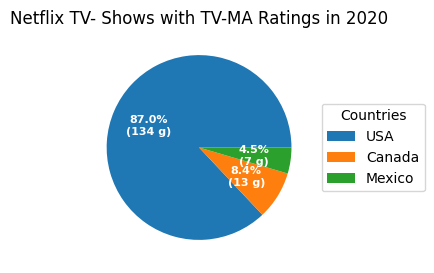

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["134 USA",
          "13 Canada",
          "7 Mexico",]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Netflix TV- Shows with TV-MA Ratings in 2020")

plt.show()

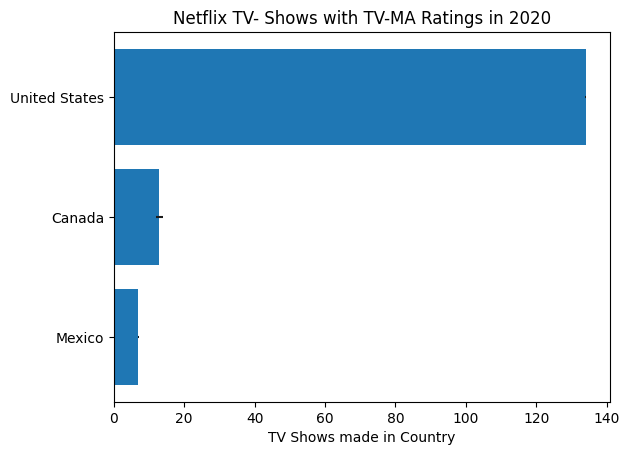

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('United States', 'Canada', 'Mexico')
y_pos = np.arange(len(pies))
performance = [134,13,7]
#error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('TV Shows made in Country')
ax.set_title('Netflix TV- Shows with TV-MA Ratings in 2020')

plt.show()

Text(0.5, 0.98, 'Netflix & Chill')

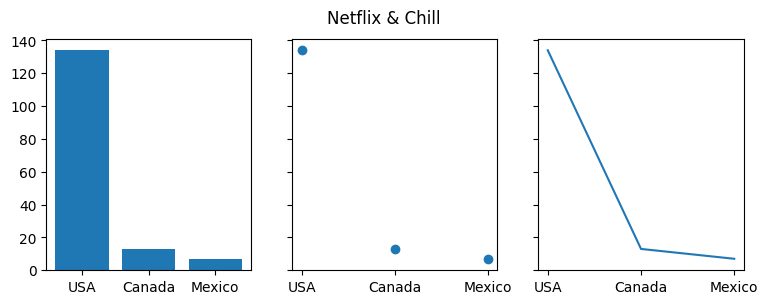

In [ ]:
import matplotlib.pyplot as plt

data = {'USA': 134, 'Canada': 13, 'Mexico': 7,}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Netflix & Chill')

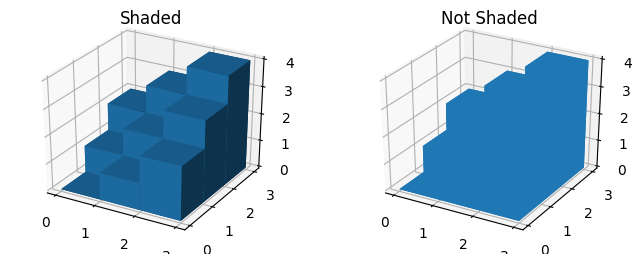

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(len(pies))
_y = np.arange(len(pies))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()